In [53]:
# interv = [7, 9, 11, 13, 15]
# count = [3, 18, 92, 80, 7]
# interv = [15, 25, 35, 45, 55]
# count = [7, 23, 40, 20, 10]
interv = [5, 15, 25, 35, 45, 55]
count = [8,11,32, 30, 12,7]
# n = 200
n = 100
x_mean = 0
dic = zip(interv, count)
for i, j in dic:
    x_mean += i*j
x_mean /= n
print(x_mean)
gamma = 0.99
s2 = 0
dic = zip(interv, count)
for i, j in dic:
    s2 += (j-x_mean)**2 * i
s2 /= (n-1)
s2

11.7


667.2912060301506

In [54]:
import scipy.stats as stat
n = 200
print((n-1)*s2/stat.chi2.cdf(29, (1+gamma)/2))

132790.95949875223


In [55]:
ts = [1.65, 2, 2.58]
p = 1/9
q = 8/9
n = 100
for t in ts:
    print(f"{1/9 - t*(p*q)**0.5 / n**0.5}, {1/9 + t*(p*q)**0.5 / n**0.5}")

0.05925661382409762, 0.16296560839812457
0.048257175005640224, 0.17396504721658199
0.03002953353505365, 0.19219268868716854


In [3]:
import numpy as np
print()
# mi = [12, 17, 27, 60, 19, 34, 11]
# mit = [8, 24, 30, 68, 21, 19, 10]
# mi = [5, 9, 36, 70, 99, 81, 19, 11]
# mit = [7, 12, 39, 76, 93, 67, 24, 13]
# mi = [7, 12, 49, 66, 83, 67, 24, 13]
# mit = [5, 9, 46, 60, 89, 81, 19, 11]
mi = [7, 19, 27, 51, 18, 35, 6]
mit = [6, 23, 30, 58, 20, 22, 5]

mi = [16, 21, 18, 19, 24, 22]
mit = [20, 20, 20, 20, 20, 20]

np.sum(mit)
alpha = 0.01
sum = 0
for i, j in zip(mi, mit):
    sum += ((i-j)**2)/j
    print(i, j, ((i-j)**2)/j)
print(sum)


16 20 0.8
21 20 0.05
18 20 0.2
19 20 0.05
24 20 0.8
22 20 0.2
2.1


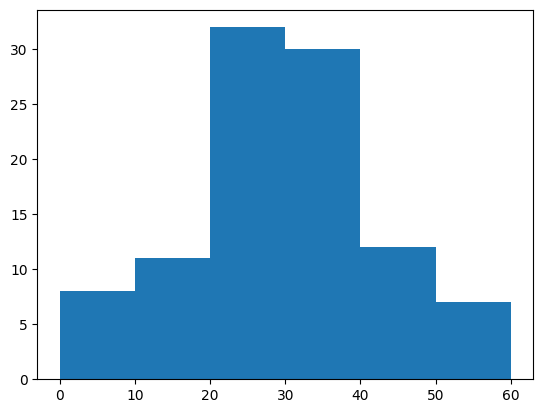

In [4]:
import matplotlib.pyplot as plt
time = [0, 10, 20, 30, 40, 50, 60]
# N_people = [5, 14, 33, 27, 15, 6]
N_people = [8,11,32, 30, 12,7]
# time = [10, 14, 18, 22, 26, 30]
# N_people = [9, 22, 35, 24, 10]
plt.stairs(N_people, time, fill=True)

In [8]:
time_1=[]
for i in range(0, len(time)-1):
    time_1.append(int((time[i+1]+time[i])/2))

print(time_1)
a = 0
n = np.sum(N_people)
for i, j in zip(time_1, N_people):
    a+=i*j/n
print(a) 
s2  = 0
for i, j in zip(time_1, N_people):
    s2+=((i-a)**2)*j/(n-1)

print(s2)
import scipy.stats as sts
s = np.sqrt(s2)
print(s)
# функция ошибок по традиции
res_n = []
import math 

for i in range(0, len(time)-1):
    print(time[i+1], time[i], math.ceil((sts.norm.cdf(time[i+1],loc=a, scale=s)-sts.norm.cdf(time[i],loc=a, scale=s))*n))
    res_n.append(math.ceil((sts.norm.cdf(time[i+1],loc=a, scale=s)-sts.norm.cdf(time[i],loc=a, scale=s))*n))

[5, 15, 25, 35, 45, 55]
29.800000000000004
162.5858585858586
12.750915990071404
10 0 6
20 10 17
30 20 29
40 30 29
50 40 16
60 50 5


In [6]:
print(res_n)
np.sum(res_n)

[6, 17, 29, 29, 16, 5]


102

In [7]:
mi = N_people
mit = res_n

np.sum(mit)
alpha = 0.01
sum = 0
for i, j in zip(mi, mit):
    sum += ((i-j)**2)/j
    print(i, j, ((i-j)**2)/j)
print(sum)

8 6 0.6666666666666666
11 17 2.1176470588235294
32 29 0.3103448275862069
30 29 0.034482758620689655
12 16 1.0
7 5 0.8
4.929141311697092


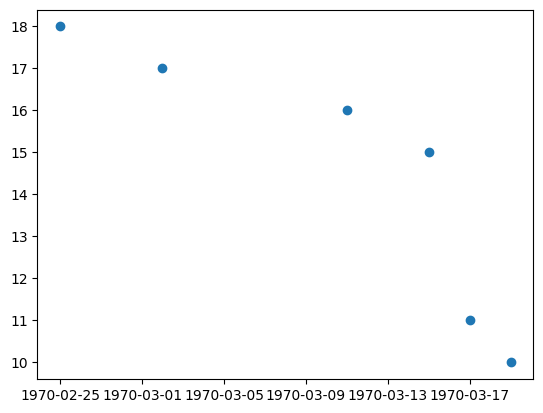

In [61]:
########################## 12.12 #################################
x = [77, 69, 75, 55, 73, 60]
y = [10, 16, 11, 18, 15, 17]
import matplotlib.pyplot as plt
import numpy as np
plt.plot_date(x, y)

plt.show()

In [62]:
x_ = np.mean(x)
y_ = np.mean(y)
print("means: ", x_, y_)
n = len(x)
cov = 0
for i, j in zip(x, y):
    tmp_x = i-x_
    tmp_y = j-y_
    print(tmp_x, tmp_y)
    cov+=tmp_x*tmp_y
cov/=n
print("cov: ", cov)

means:  68.16666666666667 14.5
8.833333333333329 -4.5
0.8333333333333286 1.5
6.833333333333329 -3.5
-13.166666666666671 3.5
4.833333333333329 0.5
-8.166666666666671 2.5
cov:  -21.083333333333332


In [63]:
import scipy.stats as stats
import statistics
s2 = statistics.variance(x)
print(s2)
b1 = -0.325

b0 = y_ - b1*x_
b0
y_new = []
for i in x:
    y_new.append(b0 + b1*i)
print(y_new)


77.76666666666667
[11.629166666666666, 14.229166666666668, 12.279166666666669, 18.77916666666667, 12.929166666666667, 17.15416666666667]


In [64]:
y_new_ = np.mean(y_new)
print(y_new_)


14.5


In [65]:
errors = []
for i, j in zip(y, y_new):
    errors.append(i-j)

print(errors)
print(np.mean(errors))

[-1.6291666666666664, 1.7708333333333321, -1.2791666666666686, -0.7791666666666686, 2.070833333333333, -0.15416666666666856]
-1.1842378929335002e-15


In [66]:
ess = 0
for i in errors:
    ess+=i*i

print(ess)


12.345520833333335


In [67]:
rss = 0
for i in y_new:
    rss+=(i-y_)**2
print(rss)

41.07052083333335


In [68]:
tss = 0
for i in y:
    tss+=(i-y_)**2
print(tss)

53.5


In [38]:
import numpy as np
import scipy.stats as stats
import statistics

In [25]:
# arr = [АГ 66,4; НЕ 76,6; ГГ 83,6; ЕН 79,5; НЩ 77; ПК 61,8; ГВ 75,6;
# ЛН 72,8; ИГ 68,1; АЗ 79,8.]
test = "ЛФ 56,5; РГ 78,7; НО 84,1; ЛЛ 67,8; ВВ 59,5; ОП 66,8; ЩД 61; НФ 65,9; БГ 59,1; ЛВ 60,1"
test = test.replace(",", ".")
test= test.replace(";", ",")
test = test.split()
t = []
for i in range(len(test)):
    if i%2 != 0:
        t.append(test[i])
st = ""
for i in t:
    st+=" "+i
print(st)

 56.5, 78.7, 84.1, 67.8, 59.5, 66.8, 61, 65.9, 59.1, 60.1


In [36]:
arr = [ 56.5, 78.7, 84.1, 67.8, 59.5, 66.8, 61, 65.9, 59.1, 60.1]
mean = np.mean(arr)
var = np.var(arr, ddof=1)
# var = statistics.variance(arr)
print(mean, var)
s = np.sqrt(var)
t_gamma = 3.25
delta = s*t_gamma/np.sqrt(len(arr))
print(s, delta)
print(mean-delta, mean+delta)

print(np.sqrt(10))


65.95 81.40944444444442
9.022718240333365 9.273010605754983
56.67698939424502 75.22301060575498
3.1622776601683795


In [42]:
s2_1 = 46.34
x_1 = 74.12
s2_2 = 81.41
x_2 = 65.95
print(1-.05)
# print((s2_1+s2_2)/2)
# print((x_1+x_2)/np.sqrt((s2_1+s2_2)/2)*np.sqrt(1/10 + 1/10))
print(s2_2/s2_1)
print(stats.f.ppf(q=1-.05, dfn=6, dfd=8))

0.95
1.7567975830815707
3.5805803197614616
